## Stock Performance Tracker


## Setup


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import utils, draw_utils, process_utils, const


In [2]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

# plt.style.use("fivethirtyeight")


In [3]:
log_df, cf_df = process_utils.prepare_log_df_cf_df()


## [Chart] Index over time


/Users/kaestrl/projects/python/stock_tracker/draw_utils.py:17: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(


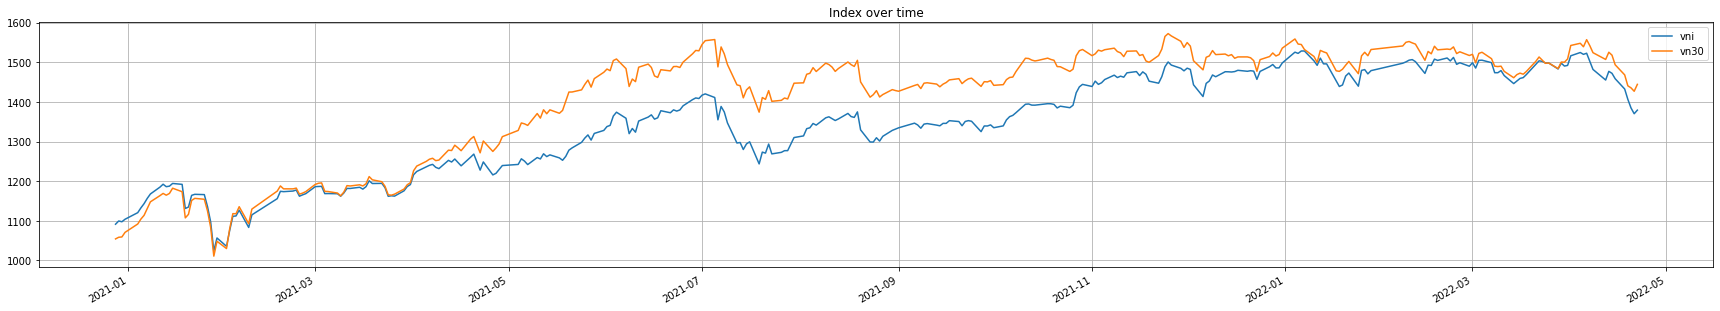

In [4]:
index_values_dict = {
    index_name: list(log_df[index_name]) for index_name in const.INDEX_NAME_L
}
draw_utils.plot_indices_over_time(
    time_series=list(log_df.index),
    index_values_dict=index_values_dict,
)


## [Chart] NAV stack


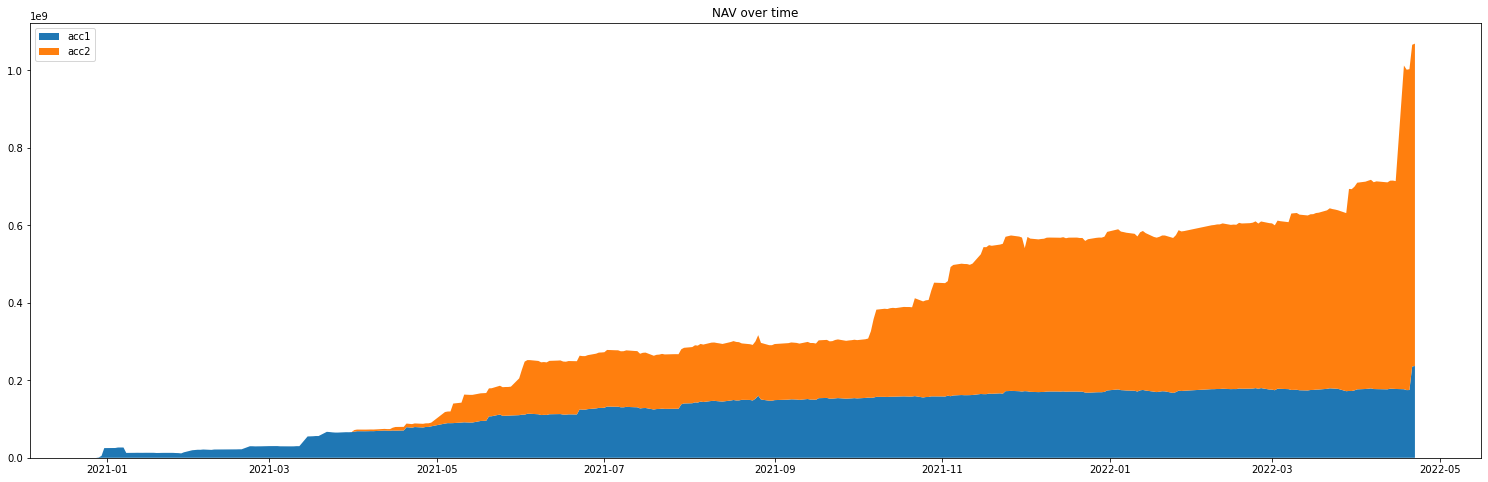

In [5]:
y_list = [log_df[acc_name] for acc_name in const.ACC_NAME_L]

draw_utils.plot_nav_stackplot(
    x=log_df.index,  # type: ignore
    y=y_list,
    labels=const.ACC_NAME_L,
)


## [Chart] NAV pie


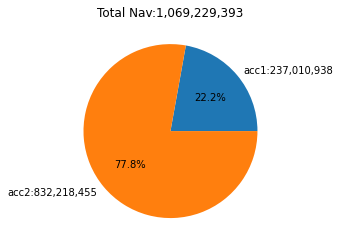

In [6]:
nav_l = [log_df[acc_name].iloc[-1] for acc_name in const.ACC_NAME_L]  # type: ignore
label_l = [f"{acc_name}:{nav:,}" for acc_name, nav in zip(const.ACC_NAME_L, nav_l)]
draw_utils.plot_nav_pie(nav_l, label_l=label_l)


## [Chart] Profit


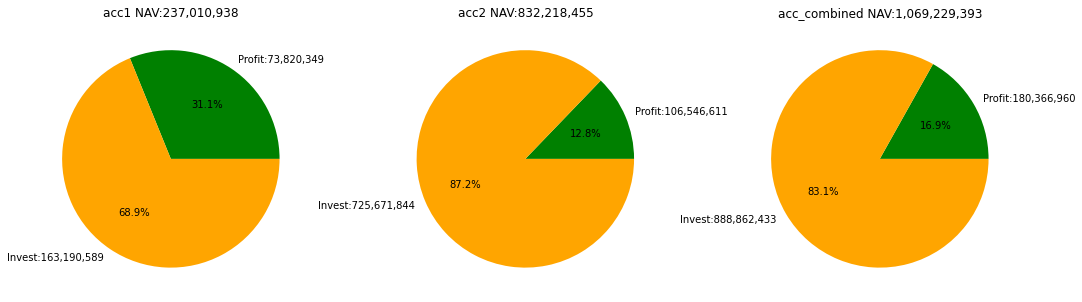

In [7]:
profit_invest_list: list[tuple[str, float, float]] = []
for name in const.ALL_ACC_NAME_L:
    nav = log_df[name].iloc[-1]
    invest = -cf_df[name].sum()
    profit = nav - invest
    profit_invest_list.append((name, profit, invest))

draw_utils.plot_profit_invest_pies(profit_invest_list)


## [Chart] Diff percent


### Histogram


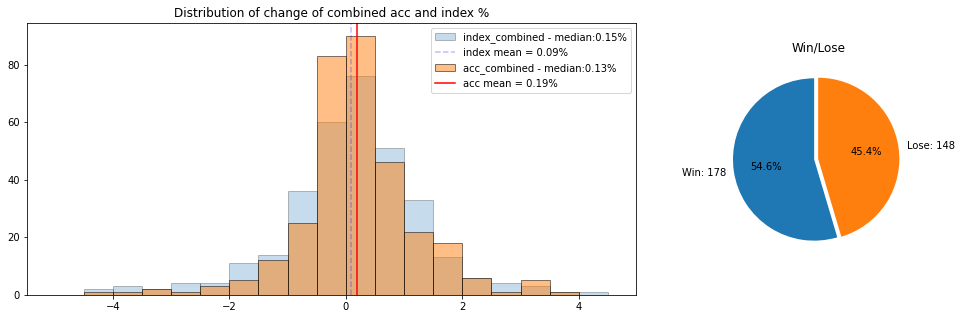

In [8]:
draw_utils.plot_daily_diff_p_distribution(
    log_df,
    acc_name=const.ACC_COMBINED_NAME,
    index_name=const.INDEX_COMBINED_NAME,
)


## [Chart] Daily


### Latest growth


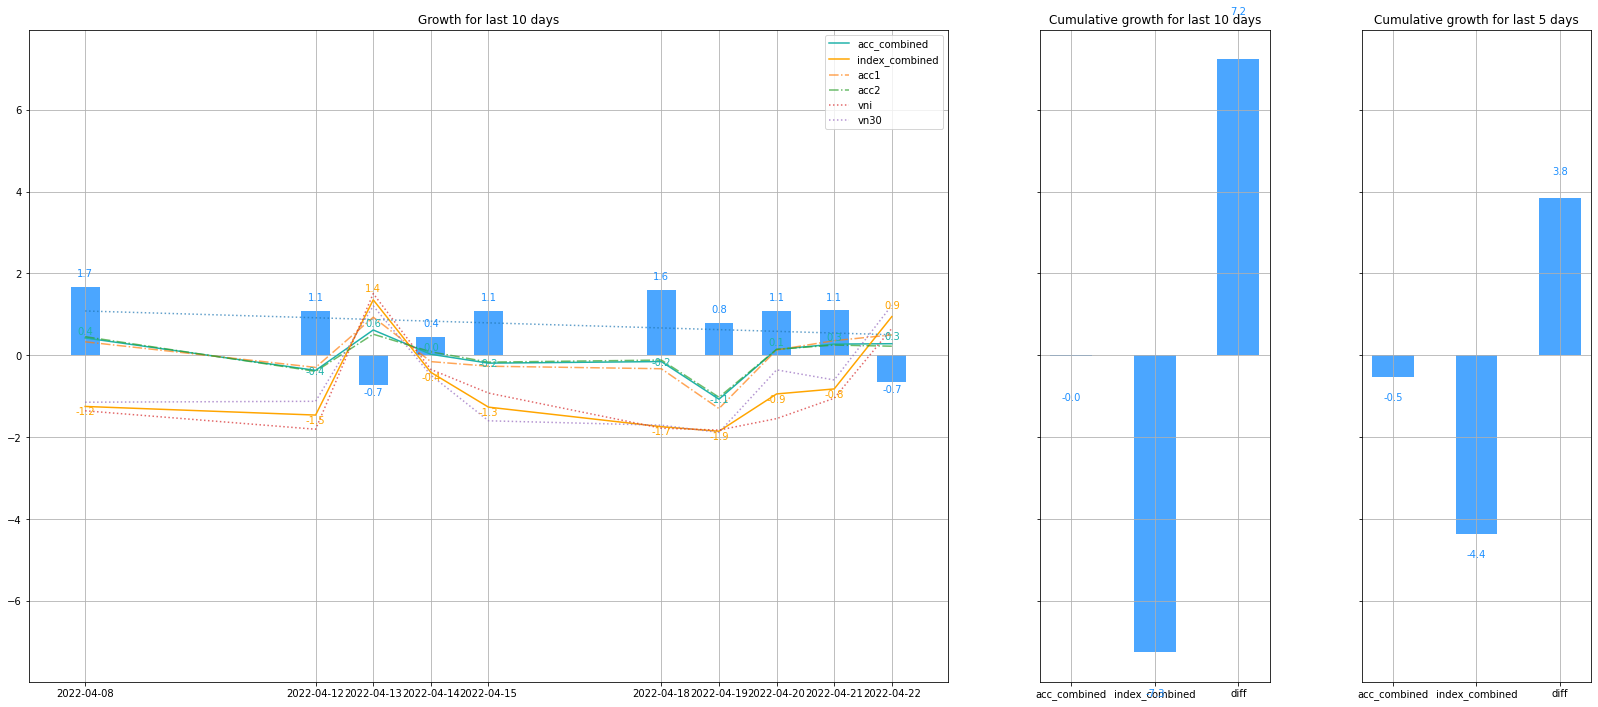

In [9]:
draw_utils.plot_recent_growth(
    log_df,
    num_days=10,
    main_acc_name=const.ACC_COMBINED_NAME,
    main_index_name=const.INDEX_COMBINED_NAME,
    secondary_acc_name_l=const.ACC_NAME_L,
    secondary_index_name_l=const.INDEX_NAME_L,
)


In [10]:
log_df.tail(10)  # type: ignore


,acc1,acc2,vni,vn30,acc1_diff,acc2_diff,vni_diff,vn30_diff,acc_combined,acc_combined_diff,index_combined,index_combined_diff,acc1_diff_p,acc1_aux_diff_p,acc2_diff_p,acc2_aux_diff_p,acc_combined_diff_p,acc_combined_aux_diff_p,vni_diff_p,vni_aux_diff_p,vn30_diff_p,vn30_aux_diff_p,index_combined_diff_p,index_combined_aux_diff_p
date,,,,,,,,,,,,,,,,,,,,,,,,
2022-04-08,177320024,536358112,1482.00,1524.31,583904.0,2434146.0,-20.35,-17.65,713678136,3018050.0,1503.155,-19.000,0.003304,1.003304,0.004559,1.004559,0.004247,1.004247,-0.013545,0.986455,-0.011446,0.988554,-0.012482,0.987518
2022-04-12,176797699,534260028,1455.25,1507.20,-522325.0,-2098084.0,-26.75,-17.11,711057727,-2620409.0,1481.225,-21.930,-0.002946,0.997054,-0.003912,0.996088,-0.003672,0.996328,-0.018050,0.981950,-0.011225,0.988775,-0.014589,0.985411
2022-04-13,178443277,537017705,1477.20,1525.39,1645578.0,2757677.0,21.95,18.19,715460982,4403255.0,1501.295,20.070,0.009308,1.009308,0.005162,1.005162,0.006193,1.006193,0.015083,1.015083,0.012069,1.012069,0.013550,1.013550
2022-04-14,178169585,537477167,1472.12,1518.01,-273692.0,459462.0,-5.08,-7.38,715646752,185770.0,1495.065,-6.230,-0.001534,0.998466,0.000856,1.000856,0.000260,1.000260,-0.003439,0.996561,-0.004838,0.995162,-0.004150,0.995850
2022-04-15,177696243,536585967,1458.56,1493.74,-473342.0,-891200.0,-13.56,-24.27,714282210,-1364542.0,1476.150,-18.915,-0.002657,0.997343,-0.001658,0.998342,-0.001907,0.998093,-0.009211,0.990789,-0.015988,0.984012,-0.012652,0.987348
2022-04-18,177064819,835621795,1432.60,1468.25,-581424.0,-964172.0,-25.96,-25.49,1012686614,-1545596.0,1450.425,-25.725,-0.003273,0.996727,-0.001153,0.998847,-0.001524,0.998476,-0.017798,0.982202,-0.017065,0.982935,-0.017427,0.982573
2022-04-19,174762491,827075354,1406.45,1440.61,-2302328.0,-8546441.0,-26.15,-27.64,1001837845,-10848769.0,1423.530,-26.895,-0.013003,0.986997,-0.010228,0.989772,-0.010713,0.989287,-0.018254,0.981746,-0.018825,0.981175,-0.018543,0.981457
2022-04-20,174991558,828288112,1384.72,1435.50,229067.0,1212758.0,-21.73,-5.11,1003279670,1441825.0,1410.110,-13.420,0.001311,1.001311,0.001466,1.001466,0.001439,1.001439,-0.015450,0.984550,-0.003547,0.996453,-0.009427,0.990573
2022-04-21,235833911,830367127,1370.21,1426.87,842353.0,2079015.0,-14.51,-8.63,1066201038,2921368.0,1398.540,-11.570,0.003585,1.003585,0.002510,1.002510,0.002748,1.002748,-0.010479,0.989521,-0.006012,0.993988,-0.008205,0.991795


### XIRR


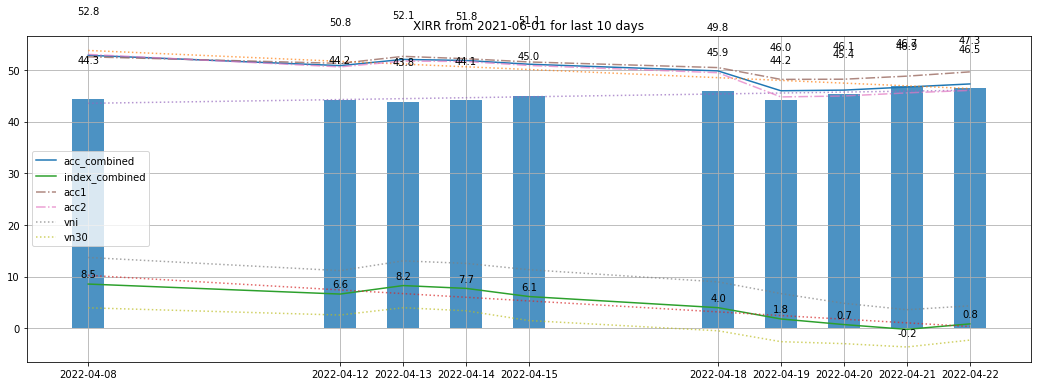

In [11]:
draw_utils.plot_recent_xirr(
    log_df=log_df,
    cf_df=cf_df,
    num_days=10,
    anchor_date='2021-06-01',
    main_acc_name=const.ACC_COMBINED_NAME,
    main_index_name=const.INDEX_COMBINED_NAME,
    secondary_acc_name_l=const.ACC_NAME_L,
    secondary_index_name_l=const.INDEX_NAME_L,
)

In [12]:
# xirr_df  # type: ignore


### Income


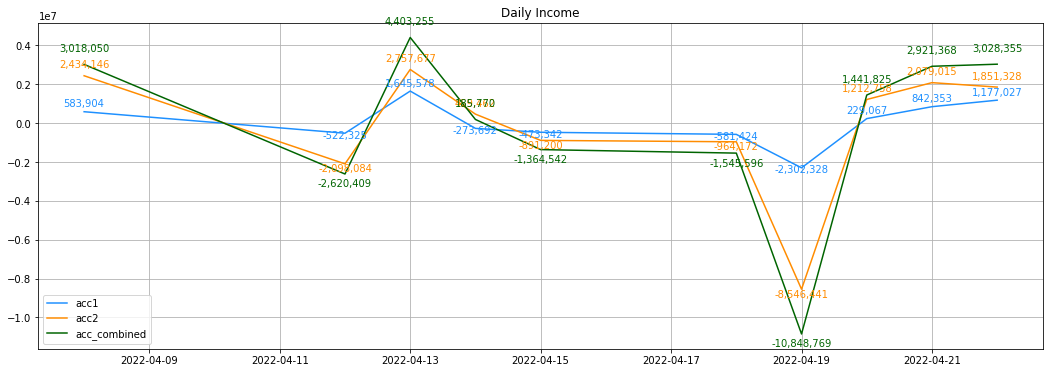

In [13]:
draw_utils.plot_recent_income(
    daily_df=log_df,
    num_days=10,
    name_l=const.ALL_ACC_NAME_L,
    color_l=const.COLOR_LIST[: len(const.ALL_ACC_NAME_L)],
)


In [14]:
# recent_daily_df  # type: ignore


### Growth time series


In [31]:
anchor_date = "2022-1-1"

growth_xirr_df = process_utils.get_overall_growth_xirr_df(
    log_df,
    cf_df,
    anchor_date=anchor_date,
    acc_name_l=const.ALL_ACC_NAME_L,
    index_name_l=const.ALL_INDEX_NAME_L,
)


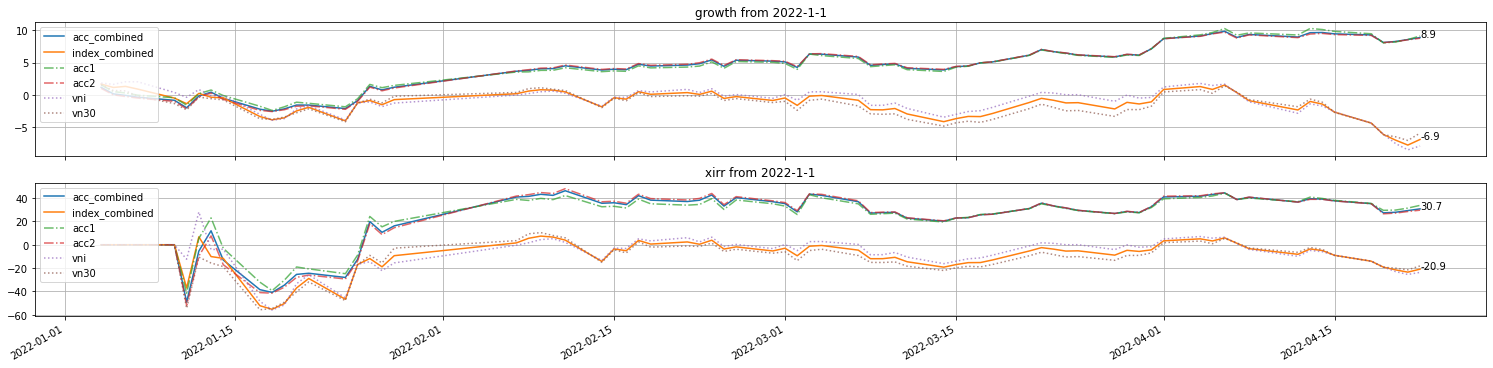

In [32]:
draw_utils.plot_growth_xirr_over_time(
    growth_xirr_df,
    anchor_date=anchor_date,
    main_acc_name=const.ACC_COMBINED_NAME,
    main_index_name=const.INDEX_COMBINED_NAME,
    secondary_acc_name_l=const.ACC_NAME_L,
    secondary_index_name_l=const.INDEX_NAME_L,
)


In [17]:
# growth_xirr_df  # type: ignore


## [Process] Add period info


In [18]:
log_df = process_utils.add_period_cols(log_df)
# log_df.tail()


## [Chart] Weekly


In [19]:
weekly_df = process_utils.get_period_df(
    period_symbol="W",
    df=log_df,
    cashflow_df=cf_df,
    all_acc_name_l=const.ALL_ACC_NAME_L,
    index_name_combined_l=const.ALL_INDEX_NAME_L,
)
# Not enough space to plot every week
weekly_df = process_utils.filter_latest_x_rows(df=weekly_df, row_num=20)  # type: ignore


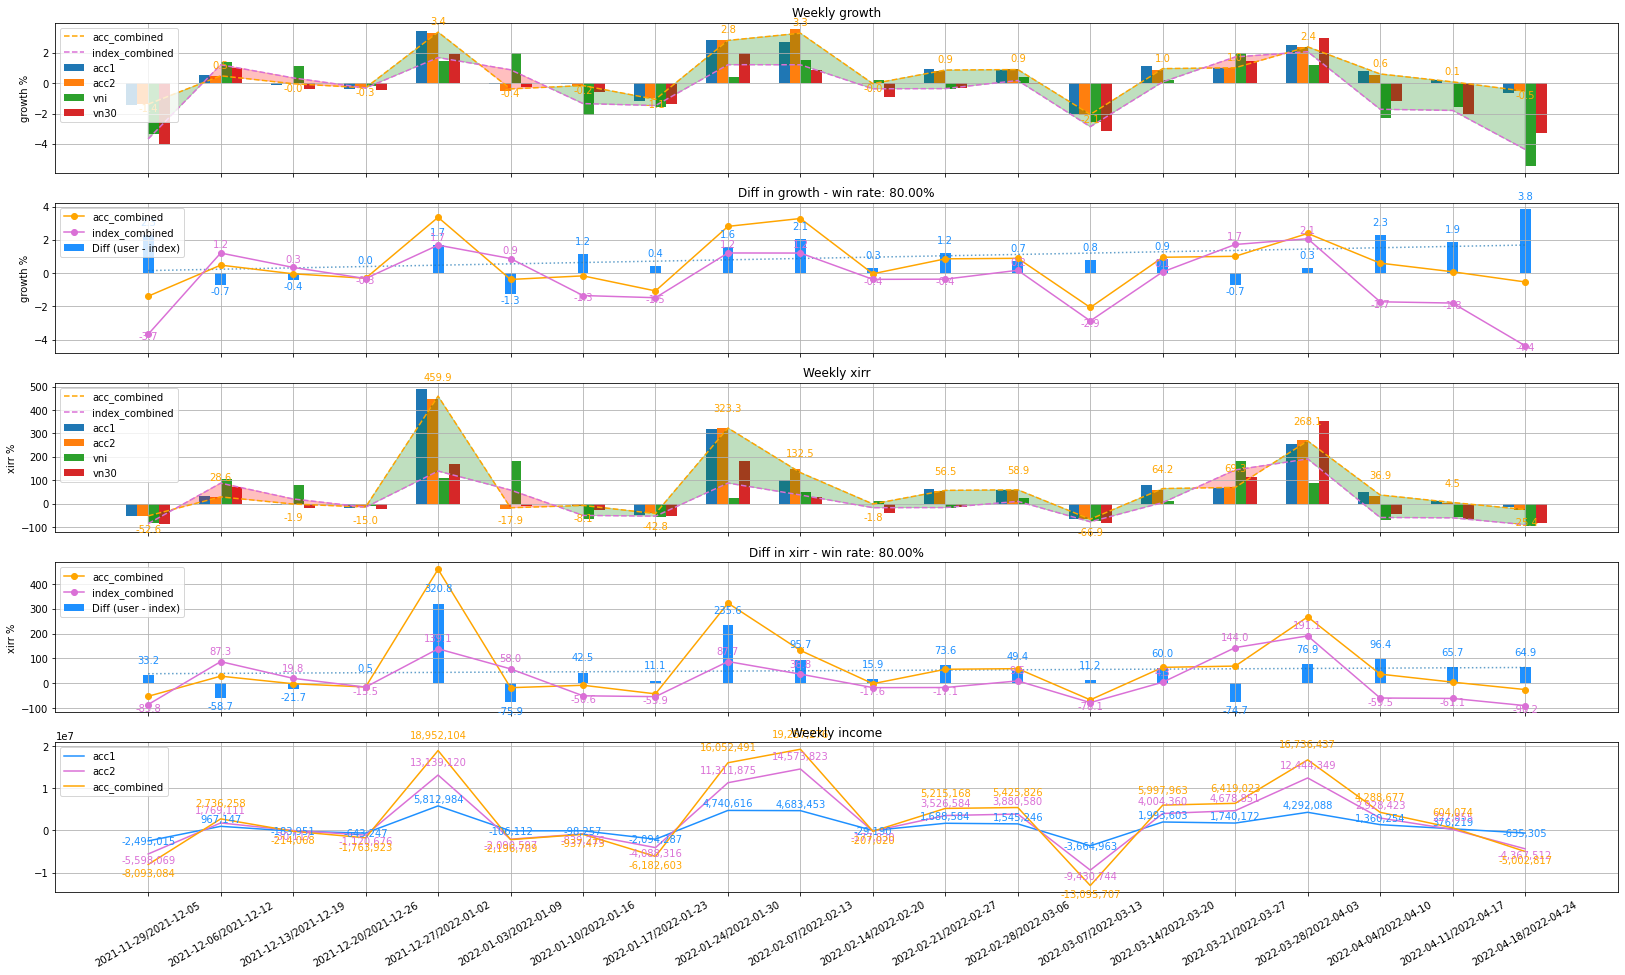

In [20]:
draw_utils.plot_period_growth_xirr(
    growth_xirr_df=weekly_df,
    period_name="Weekly",
    acc_name_l=const.ACC_NAME_L,
    index_name_l=const.INDEX_NAME_L,
    acc_combined_name=const.ACC_COMBINED_NAME,
    index_combined_name=const.INDEX_COMBINED_NAME,
    all_acc_name_l=const.ALL_ACC_NAME_L,
)


In [21]:
# weekly_df.tail()


## [Chart] Monthly


In [22]:
monthly_df = process_utils.get_period_df(
    period_symbol="M",
    df=log_df,
    cashflow_df=cf_df,
    all_acc_name_l=const.ALL_ACC_NAME_L,
    index_name_combined_l=const.ALL_INDEX_NAME_L,
)
# Insufficient data for 2020-12
monthly_df.drop(["2020-12"], inplace=True)


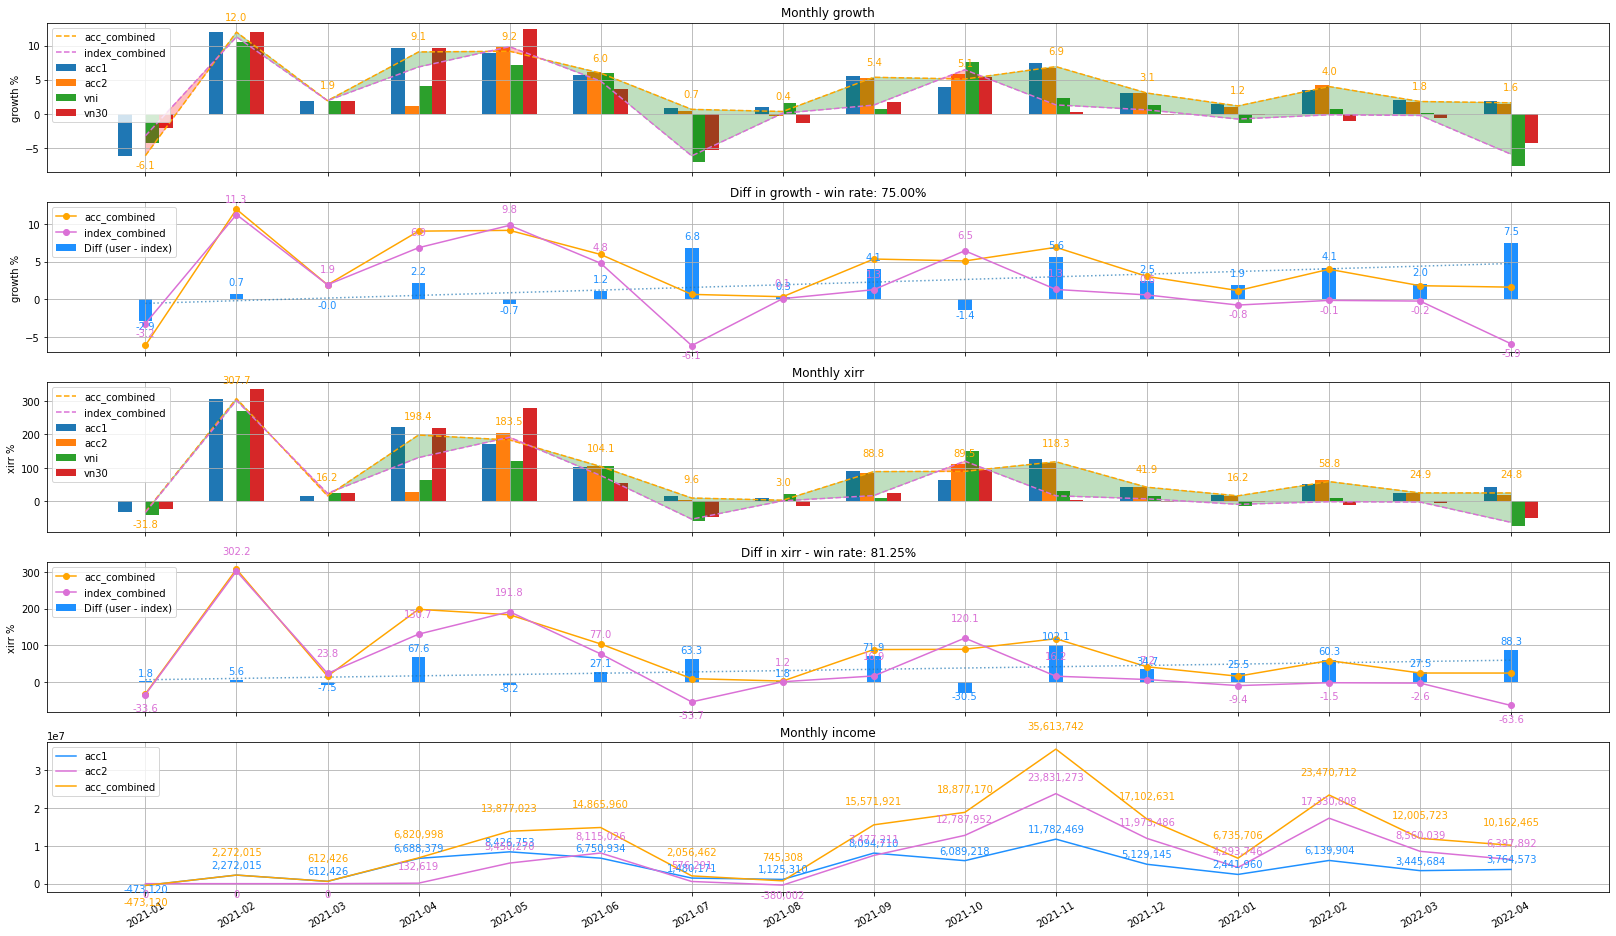

In [23]:
draw_utils.plot_period_growth_xirr(
    growth_xirr_df=monthly_df,
    period_name="Monthly",
    acc_name_l=const.ACC_NAME_L,
    index_name_l=const.INDEX_NAME_L,
    acc_combined_name=const.ACC_COMBINED_NAME,
    index_combined_name=const.INDEX_COMBINED_NAME,
    all_acc_name_l=const.ALL_ACC_NAME_L,
)


In [24]:
# monthly_df # type: ignore


## Quaterly


In [25]:
quaterly_df = process_utils.get_period_df(
    period_symbol="Q",
    df=log_df,
    cashflow_df=cf_df,
    all_acc_name_l=const.ALL_ACC_NAME_L,
    index_name_combined_l=const.ALL_INDEX_NAME_L,
)
# Insufficient data for 2020Q4
quaterly_df.drop(["2020Q4"], inplace=True)


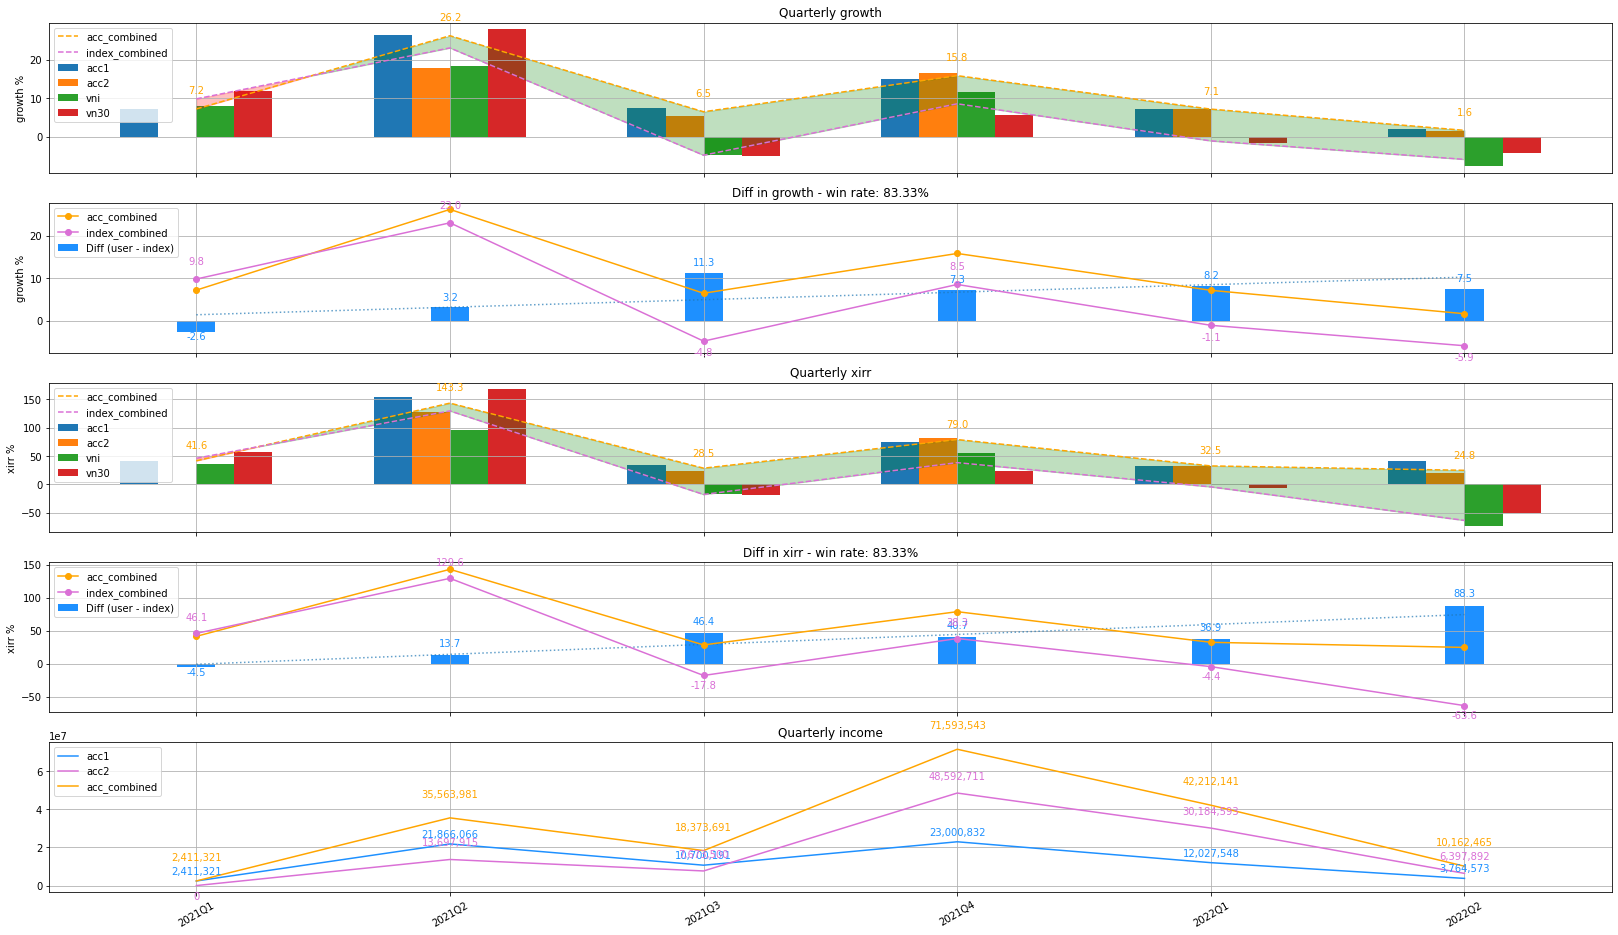

In [26]:
draw_utils.plot_period_growth_xirr(
    growth_xirr_df=quaterly_df,
    period_name="Quarterly",
    acc_name_l=const.ACC_NAME_L,
    index_name_l=const.INDEX_NAME_L,
    acc_combined_name=const.ACC_COMBINED_NAME,
    index_combined_name=const.INDEX_COMBINED_NAME,
    all_acc_name_l=const.ALL_ACC_NAME_L,
)


In [27]:
# quaterly_df  # type: ignore


## Yearly


In [28]:
yearly_df = process_utils.get_period_df(
    period_symbol="Y",
    df=log_df,
    cashflow_df=cf_df,
    all_acc_name_l=const.ALL_ACC_NAME_L,
    index_name_combined_l=const.ALL_INDEX_NAME_L,
)
# Insufficient data for 2020
yearly_df.drop(["2020"], inplace=True)


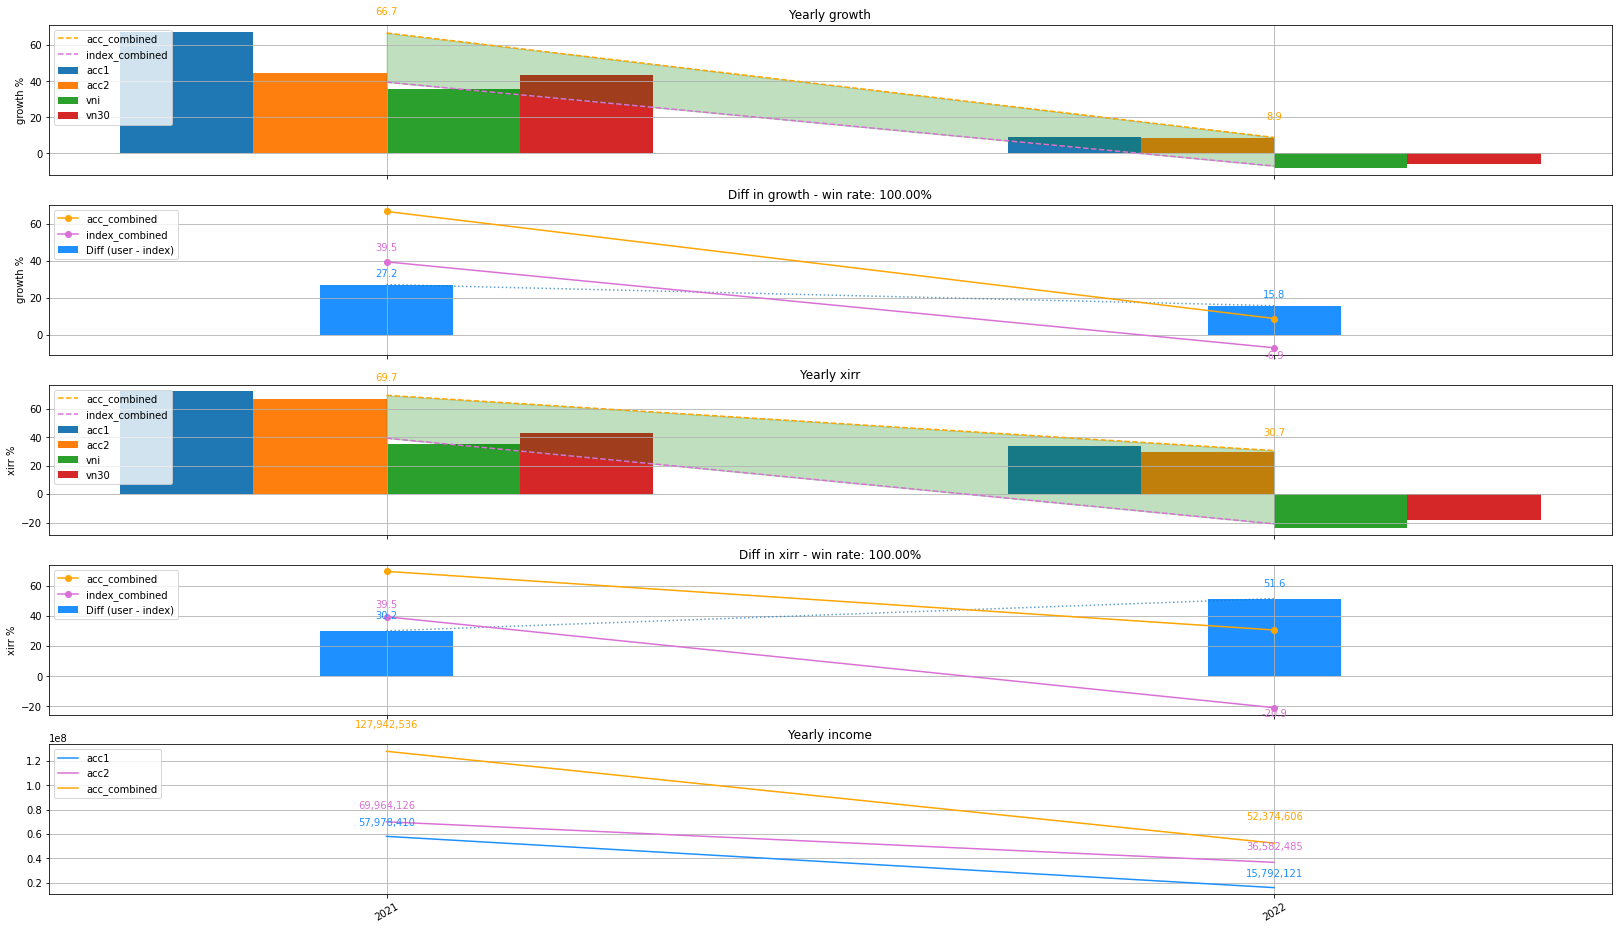

In [29]:
draw_utils.plot_period_growth_xirr(
    growth_xirr_df=yearly_df,
    period_name="Yearly",
    acc_name_l=const.ACC_NAME_L,
    index_name_l=const.INDEX_NAME_L,
    acc_combined_name=const.ACC_COMBINED_NAME,
    index_combined_name=const.INDEX_COMBINED_NAME,
    all_acc_name_l=const.ALL_ACC_NAME_L,
)


In [30]:
# yearly_df # noqa
